In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
nba = pd.read_csv("..\\data\\nba\\nba_contracts_history.csv").dropna(how='all')
nba.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0


In [21]:
nba.columns

Index(['NAME', 'CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP',
       'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',
       '+/-'],
      dtype='object')

In [22]:
nba = nba[['NAME', 'CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP', 'W', 'L', 'MIN','+/-']].drop_duplicates()

In [23]:
nba.sort_values(by=['AVG_SALARY'], ascending = False).head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,+/-
99,Kevin Durant,2018,2019,3.359950e+07,29.0,68.0,49.0,19.0,2325.0,351.0
152,LeBron James,2016,2017,3.212458e+07,31.0,76.0,56.0,20.0,2709.0,618.0
17,Kyle Lowry,2017,2019,3.163333e+07,31.0,60.0,36.0,24.0,2244.0,356.0
116,Gordon Hayward,2017,2020,3.121430e+07,27.0,73.0,46.0,27.0,2516.0,347.0
88,James Harden,2016,2019,3.090212e+07,26.0,82.0,41.0,41.0,3125.0,124.0


In [24]:
nba.sort_values(by=['AVG_SALARY']).head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,+/-
30,E'Twaun Moore,2012,2013,823244.0,23.0,38.0,24.0,14.0,331.0,31.0
44,Quinn Cook,2017,2018,867391.5,24.0,14.0,9.0,5.0,187.0,-41.0
163,Christian Wood,2016,2017,874636.0,20.0,17.0,0.0,17.0,145.0,-49.0
134,Justin Holiday,2015,2016,981486.0,26.0,59.0,49.0,10.0,657.0,-13.0
133,E'Twaun Moore,2014,2015,981792.0,25.0,79.0,22.0,57.0,1506.0,-147.0


In [25]:
#It's uses only by numerical variables
nba[['AVG_SALARY', 'AGE', 'GP', 'W', 'L', 'MIN' , '+/-']].corr()

,AVG_SALARY,AGE,GP,W,L,MIN,+/-
AVG_SALARY,1.000000,0.163384,0.321118,0.440450,-0.011722,0.650799,0.511799
AGE,0.163384,1.000000,0.187314,0.192270,0.065215,0.218862,0.118044
GP,0.321118,0.187314,1.000000,0.742204,0.664951,0.789263,0.165053
W,0.440450,0.192270,0.742204,1.000000,-0.007015,0.618043,0.659790
L,-0.011722,0.065215,0.664951,-0.007015,1.000000,0.488881,-0.489038
MIN,0.650799,0.218862,0.789263,0.618043,0.488881,1.000000,0.331420
+/-,0.511799,0.118044,0.165053,0.659790,-0.489038,0.331420,1.000000


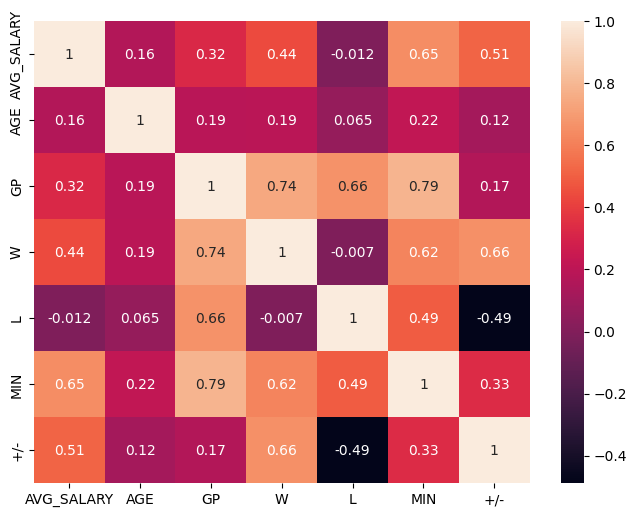

In [26]:
corr_df = nba[['AVG_SALARY', 'AGE', 'GP', 'W', 'L', 'MIN' , '+/-']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [27]:
nba[['AVG_SALARY', 'AGE', 'GP', 'W', 'L', 'MIN' , '+/-']].cov()

,AVG_SALARY,AGE,GP,W,L,MIN,+/-
AVG_SALARY,6.216075e+13,3.666938e+06,4.884634e+07,5.004138e+07,-1.195043e+06,3.983955e+09,9.205679e+08
AGE,3.666938e+06,8.103497e+00,1.028765e+01,7.887197e+00,2.400451e+00,4.837437e+02,7.666187e+01
GP,4.884634e+07,1.028765e+01,3.722353e+02,2.063510e+02,1.658843e+02,1.182332e+04,7.264898e+02
W,5.004138e+07,7.887197e+00,2.063510e+02,2.076581e+02,-1.307081e+00,6.915159e+03,2.169096e+03
L,-1.195043e+06,2.400451e+00,1.658843e+02,-1.307081e+00,1.671914e+02,4.908163e+03,-1.442606e+03
MIN,3.983955e+09,4.837437e+02,1.182332e+04,6.915159e+03,4.908163e+03,6.028625e+05,5.870643e+04
+/-,9.205679e+08,7.666187e+01,7.264898e+02,2.169096e+03,-1.442606e+03,5.870643e+04,5.204709e+04


In [28]:
def salarios(salario):
    if(salario<=4767000):
        return '1'
    if(salario<=9553750):
        return '2'
    if(salario<=16394360):
        return '3'
    if(salario<=33599500):
        return '4'
def edades(edad):
    if (edad<=22):
        return '1'
    if (edad<=25):
        return '2'
    if (edad<=30):
        return '3'
    if (edad<=36):
        return '4'

In [29]:
nba['Clasif salario'] = nba['AVG_SALARY'].apply(salarios)
nba['Clasif edad'] = nba['AGE'].apply(edades)

In [30]:
tabla_frecuencia = pd.crosstab(index=nba['Clasif salario'], columns=nba['Clasif edad'])
tabla_frecuencia

Clasif edad,1,2,3,4
Clasif salario,,,,
1,6,22,18,5
2,1,24,18,5
3,4,28,14,3
4,1,17,29,3


In [31]:
tabla_frecuencia = tabla_frecuencia.set_axis(['[823244-4767000]','[4767001-9553750]',
                    '[9553751-16394360]','[16394361-33599500]'], axis='index').set_axis(['[20-22]'
                    ,'[23-25]','[26-30]','[31-36]'],axis='columns')


In [32]:
tabla_frecuencia

,[20-22],[23-25],[26-30],[31-36]
[823244-4767000],6,22,18,5
[4767001-9553750],1,24,18,5
[9553751-16394360],4,28,14,3
[16394361-33599500],1,17,29,3
